# **Introduction**
If we may be consider to be a host of Airbnb, what should we write in some description? In this Notebook, we will try to use some factors and find to what descriptive factors affect to number of reviews which might be barometer of evaluation by users. And, what kind of vocaburaries are used in description. I use Google Colab with Kaggle API to get Seattle Airbnb dataset.
Hope to answer these questions;
*   What percentage is null data in categorical data? Is there a something tendency?
*   What vocaburaries are there in description?
*   How much difference is average of number of reviews with or without categorical data?






# **Using Kaggle API to download Seattle Airbnb dataset**

In [1]:
# Install kaggle
!pip install kaggle

In [2]:
# Upload kaggle json file from Google Drive
from googleapiclient.discovery import build
import io, os
from googleapiclient.http import MediaIoBaseDownload
from google.colab import auth

auth.authenticate_user()

drive_service = build('drive', 'v3')
results = drive_service.files().list(
        q="name = 'kaggle.json'", fields="files(id)").execute()
kaggle_api_key = results.get('files', [])

filename = "/root/.kaggle/kaggle.json"
os.makedirs(os.path.dirname(filename), exist_ok=True)

request = drive_service.files().get_media(fileId=kaggle_api_key[0]['id'])
fh = io.FileIO(filename, 'wb')
downloader = MediaIoBaseDownload(fh, request)
done = False
while done is False:
    status, done = downloader.next_chunk()
    print("Download %d%%." % int(status.progress() * 100))
os.chmod(filename, 600)

Download 100%.


In [0]:
!chmod 600 /root/.kaggle/kaggle.json

In [4]:
# Download Airbnb Seattle dataset
!kaggle datasets download -d airbnb/seattle

 46% 9.00M/19.5M [00:00<00:00, 34.2MB/s]
100% 19.5M/19.5M [00:00<00:00, 56.0MB/s]


# **Approaching answer questions by CRISP-DM**


*   Business Understanding

> What information is available to answer questions

*   Data Understanding

> Know what kind of columns in data and how they relate to each other 


*   Data Preparation

> Clean data, specifically category data


*   Modeling

> Find correlation and tendency


*   Evaluation

> Answer the questions above


*   Deployment

> Write an article on Medium










In [0]:
# Import libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from pylab import rcParams
from matplotlib.pyplot import figure
import zipfile
%matplotlib inline

In [0]:
# Extract zip file
with zipfile.ZipFile('seattle.zip', 'r') as zip_ref:
  zip_ref.extractall()

Check out the files

In [7]:
ls -la

total 107968
drwxr-xr-x 1 root root     4096 Feb  9 12:19 ./
drwxr-xr-x 1 root root     4096 Feb  9 11:45 ../
-rw-r--r-- 1 root root     2627 Feb  9 12:19 adc.json
-rw-r--r-- 1 root root 36650955 Feb  9 12:19 calendar.csv
drwxr-xr-x 1 root root     4096 Feb  9 12:19 .config/
-rw-r--r-- 1 root root 16871061 Feb  9 12:19 listings.csv
-rw-r--r-- 1 root root 36592035 Feb  9 12:19 reviews.csv
drwxr-xr-x 1 root root     4096 Feb  5 18:37 sample_data/
-rw-r--r-- 1 root root 20410379 Feb  9 12:19 seattle.zip


In [0]:
# Read each csv file
listings = pd.read_csv('listings.csv')
calendar = pd.read_csv('calendar.csv')
reviews = pd.read_csv('reviews.csv')

# **1. Business Understanding**

Look at the data



In [9]:
listings.head()

,id,listing_url,scrape_id,last_scraped,name,summary,space,description,experiences_offered,neighborhood_overview,notes,transit,thumbnail_url,medium_url,picture_url,xl_picture_url,host_id,host_url,host_name,host_since,host_location,host_about,host_response_time,host_response_rate,host_acceptance_rate,host_is_superhost,host_thumbnail_url,host_picture_url,host_neighbourhood,host_listings_count,host_total_listings_count,host_verifications,host_has_profile_pic,host_identity_verified,street,neighbourhood,neighbourhood_cleansed,neighbourhood_group_cleansed,city,state,...,bedrooms,beds,bed_type,amenities,square_feet,price,weekly_price,monthly_price,security_deposit,cleaning_fee,guests_included,extra_people,minimum_nights,maximum_nights,calendar_updated,has_availability,availability_30,availability_60,availability_90,availability_365,calendar_last_scraped,number_of_reviews,first_review,last_review,review_scores_rating,review_scores_accuracy,review_scores_cleanliness,review_scores_checkin,review_scores_communication,review_scores_location,review_scores_value,requires_license,license,jurisdiction_names,instant_bookable,cancellation_policy,require_guest_profile_picture,require_guest_phone_verification,calculated_host_listings_count,reviews_per_month
0,241032,https://www.airbnb.com/rooms/241032,20160104002432,2016-01-04,Stylish Queen Anne Apartment,NaN,Make your self at home in this charming one-be...,Make your self at home in this charming one-be...,none,NaN,NaN,NaN,NaN,NaN,https://a1.muscache.com/ac/pictures/67560560/c...,NaN,956883,https://www.airbnb.com/users/show/956883,Maija,2011-08-11,"Seattle, Washington, United States","I am an artist, interior designer, and run a s...",within a few hours,96%,100%,f,https://a0.muscache.com/ac/users/956883/profil...,https://a0.muscache.com/ac/users/956883/profil...,Queen Anne,3.0,3.0,"['email', 'phone', 'reviews', 'kba']",t,t,"Gilman Dr W, Seattle, WA 98119, United States",Queen Anne,West Queen Anne,Queen Anne,Seattle,WA,...,1.0,1.0,Real Bed,"{TV,""Cable TV"",Internet,""Wireless Internet"",""A...",NaN,$85.00,NaN,NaN,NaN,NaN,2,$5.00,1,365,4 weeks ago,t,14,41,71,346,2016-01-04,207,2011-11-01,2016-01-02,95.0,10.0,10.0,10.0,10.0,9.0,10.0,f,NaN,WASHINGTON,f,moderate,f,f,2,4.07
1,953595,https://www.airbnb.com/rooms/953595,20160104002432,2016-01-04,Bright & Airy Queen Anne Apartment,Chemically sensitive? We've removed the irrita...,"Beautiful, hypoallergenic apartment in an extr...",Chemically sensitive? We've removed the irrita...,none,"Queen Anne is a wonderful, truly functional vi...",What's up with the free pillows? Our home was...,"Convenient bus stops are just down the block, ...",https://a0.muscache.com/ac/pictures/14409893/f...,https://a0.muscache.com/im/pictures/14409893/f...,https://a0.muscache.com/ac/pictures/14409893/f...,https://a0.muscache.com/ac/pictures/14409893/f...,5177328,https://www.airbnb.com/users/show/5177328,Andrea,2013-02-21,"Seattle, Washington, United States",Living east coast/left coast/overseas. Time i...,within an hour,98%,100%,t,https://a0.muscache.com/ac/users/5177328/profi...,https://a0.muscache.com/ac/users/5177328/profi...,Queen Anne,6.0,6.0,"['email', 'phone', 'facebook', 'linkedin', 're...",t,t,"7th Avenue West, Seattle, WA 98119, United States",Queen Anne,West Queen Anne,Queen Anne,Seattle,WA,...,1.0,1.0,Real Bed,"{TV,Internet,""Wireless Internet"",Kitchen,""Free...",NaN,$150.00,"$1,000.00","$3,000.00",$100.00,$40.00,1,$0.00,2,90,today,t,13,13,16,291,2016-01-04,43,2013-08-19,2015-12-29,96.0,10.0,10.0,10.0,10.0,10.0,10.0,f,NaN,WASHINGTON,f,strict,t,t,6,1.48
2,3308979,https://www.airbnb.com/rooms/3308979,20160104002432,2016-01-04,New Modern House-Amazing water view,New modern house built in 2013. Spectacular s...,"Our house is modern, light and fresh with a wa...",New modern house built in 2013. Spectacular s...,none,Upper Queen Anne is a charming neighborhood fu...,Our house is located just 5 short blocks to To...,A bus stop is just 2 blocks away. Easy bus a...,NaN,NaN,

Some columns are categorical variables.

In [10]:
listings.describe()

,id,scrape_id,host_id,host_listings_count,host_total_listings_count,latitude,longitude,accommodates,bathrooms,bedrooms,beds,square_feet,guests_included,minimum_nights,maximum_nights,availability_30,availability_60,availability_90,availability_365,number_of_reviews,review_scores_rating,review_scores_accuracy,review_scores_cleanliness,review_scores_checkin,review_scores_communication,review_scores_location,review_scores_value,license,calculated_host_listings_count,reviews_per_month
count,3.818000e+03,3.818000e+03,3.818000e+03,3816.000000,3816.000000,3818.000000,3818.000000,3818.000000,3802.000000,3812.000000,3817.000000,97.000000,3818.000000,3818.000000,3818.000000,3818.000000,3818.000000,3818.000000,3818.000000,3818.000000,3171.000000,3160.000000,3165.000000,3160.000000,3167.000000,3163.000000,3162.000000,0.0,3818.000000,3191.000000
mean,5.550111e+06,2.016010e+13,1.578556e+07,7.157757,7.157757,47.628961,-122.333103,3.349398,1.259469,1.307712,1.735394,854.618557,1.672603,2.369303,780.447617,16.786276,36.814825,58.082504,244.772656,22.223415,94.539262,9.636392,9.556398,9.786709,9.809599,9.608916,9.452245,NaN,2.946307,2.078919
std,2.962660e+06,0.000000e+00,1.458382e+07,28.628149,28.628149,0.043052,0.031745,1.977599,0.590369,0.883395,1.139480,671.404893,1.311040,16.305902,1683.589007,12.173637,23.337541,34.063845,126.772526,37.730892,6.606083,0.698031,0.797274,0.595499,0.568211,0.629053,0.750259,NaN,5.893029,1.822348
min,3.335000e+03,2.016010e+13,4.193000e+03,1.000000,1.000000,47.505088,-122.417219,1.000000,0.000000,0.000000,1.000000,0.000000,0.000000,1.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,20.000000,2.000000,3.000000,2.000000,2.000000,4.000000,2.000000,NaN,1.000000,0.020000
25%,3.258256e+06,2.016010e+13,3.275204e+06,1.000000,1.000000,47.609418,-122.354320,2.000000,1.000000,1.000000,1.000000,420.000000,1.000000,1.000000,60.000000,2.000000,13.000000,28.000000,124.000000,2.000000,93.000000,9.000000,9.000000,10.000000,10.000000,9.000000,9.000000,NaN,1.000000,0.695000
50%,6.118244e+06,2.016010e+13,1.055814e+07,1.000000,1.000000,47.623601,-122.328874,3.000000,1.000000,1.000000,1.000000,750.000000,1.000000,2.000000,1125.000000,20.000000,46.000000,73.000000,308.000000,9.000000,96.000000,10.000000,10.000000,10.000000,10.000000,10.000000,10.000000,NaN,1.000000,1.540000
75%,8.035127e+06,2.016010e+13,2.590309e+07,3.000000,3.000000,47.662694,-122.310800,4.000000,1.000000,2.000000,2.000000,1200.000000,2.000000,2.000000,1125.000000,30.000000,59.000000,89.000000,360.000000,26.000000,99.000000,10.000000,10.000000,10.000000,10.000000,10.000000,10.000000,NaN,2.000000,3.000000
max,1.034016e+07,2.016010e+13,5.320861e+07,502.000000,502.000000,47.733358,-122.240607,16.000000,8.000000,7.000000,15.000000,3000.000000,15.000000,1000.000000,100000.000000,30.000000,60.000000,90.000000,365.000000,474.000000,100.000000,10.000000,10.000000,10.000000,10.000000,10.000000,10.000000,NaN,37.000000,12.150000


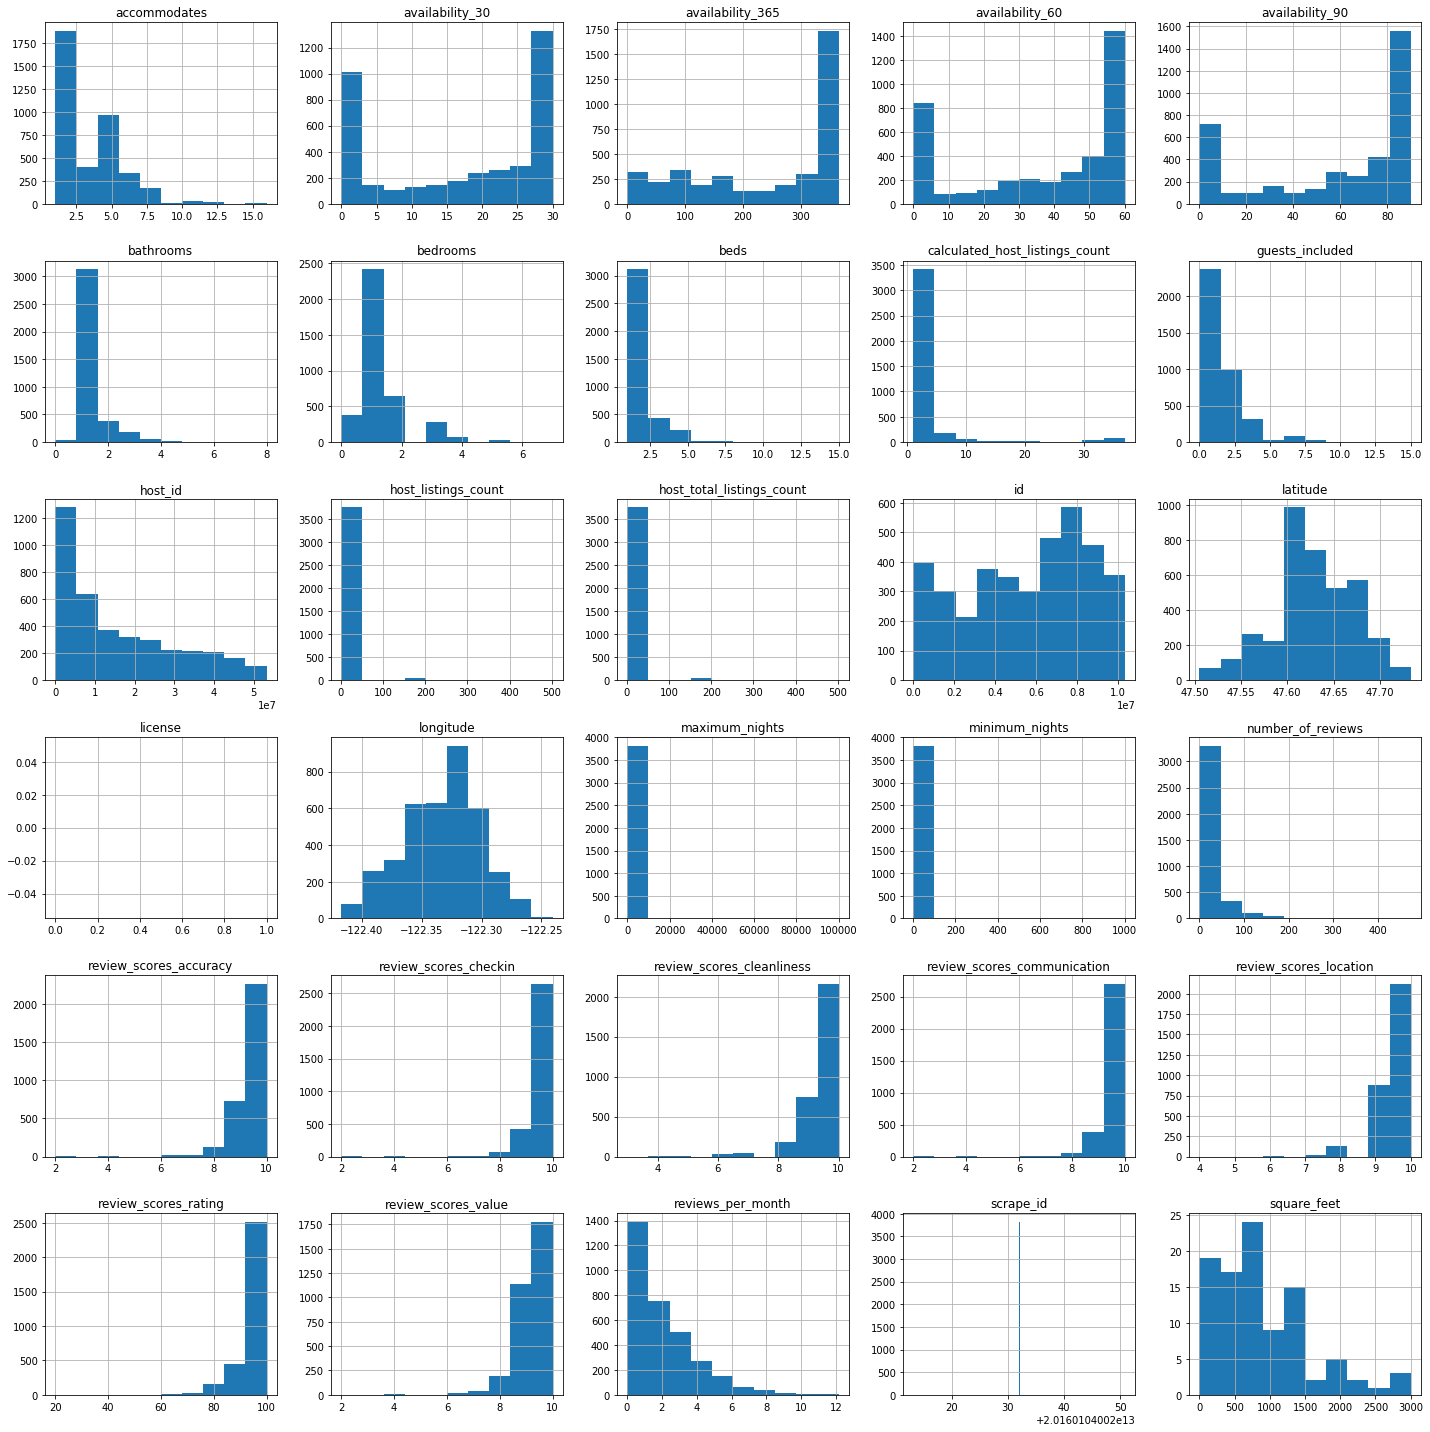

In [11]:
# Draw a histogram
rcParams['figure.figsize'] = 20, 20
listings.hist()
plt.tight_layout()
plt.show()

In [12]:
calendar.head()

,listing_id,date,available,price
0,241032,2016-01-04,t,$85.00
1,241032,2016-01-05,t,$85.00
2,241032,2016-01-06,f,NaN
3,241032,2016-01-07,f,NaN
4,241032,2016-01-08,f,NaN


# **2. Data Understanding**

There is categorical columns, and some of them seem to have a lot of null variables. Since we look at the data, some of important descriotion are null like host_about, summary. I am just curious about who wants to stay at a house whose resident is no description.
My question is 
*   What percentage is null data in categorical data? Is there a something tendency?

monthly_price             60.267156
security_deposit          51.126244
weekly_price              47.380828
notes                     42.063908
neighborhood_overview     27.029859
cleaning_fee              26.977475
transit                   24.463070
host_about                22.498690
host_acceptance_rate      20.246202
first_review              16.422211
last_review               16.422211
space                     14.903091
host_response_rate        13.698271
host_response_time        13.698271
neighbourhood             10.895757
xl_picture_url             8.381351
thumbnail_url              8.381351
medium_url                 8.381351
host_neighbourhood         7.857517
summary                    4.635935
host_location              0.209534
zipcode                    0.183342
host_picture_url           0.052383
host_name                  0.052383
host_identity_verified     0.052383
host_has_profile_pic       0.052383
host_is_superhost          0.052383
host_thumbnail_url         0

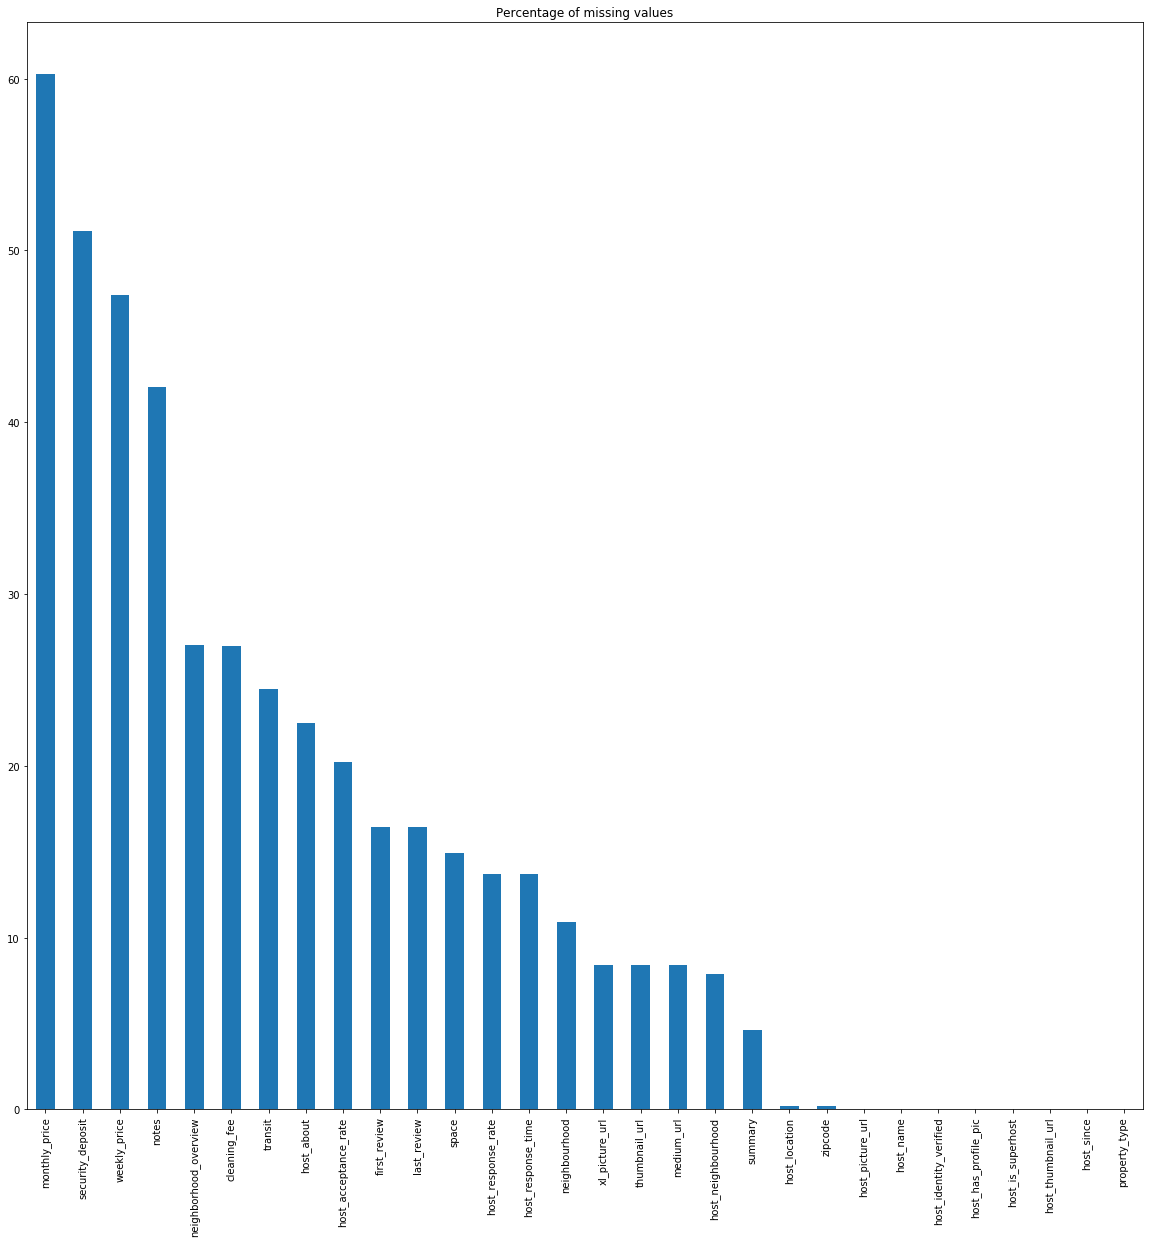

In [18]:
# Percentage of null row in categorical columns
cat_vars = listings.select_dtypes(include=['object']).copy().columns
cat_listings_null = listings[cat_vars].isnull().sum()
cat_listings = cat_listings_null[cat_listings_null != 0]
null_percentage = (cat_listings / len(listings.index) * 100).sort_values(ascending=False)
print(null_percentage)
ax = null_percentage.plot.bar(title='Percentage of missing values').get_figure()
ax.savefig('screenshot1.png')

Couple of things we guess from the above

About a half of hosts aren't supposed to provide for long term stay because Monthly price and Weekly price are null.

neighborhood_overview has about 27% null values, and host_about has about 22% null value. I believed guests don't want to stay at a room which is provided by a no-information host, but guests would stay there.


# **3. Data Preparation**


*   What vocaburaries are there in description?

Use nltk library to distinguish stopwords, and plot top 100 words.

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[('seattle', 4129), ('room', 4072), ('downtown', 3080), ('kitchen', 2985), ('bedroom', 2841), ('home', 2749), ('bed', 2611), ('space', 2587), ('apartment', 2471), ('private', 2370), ('house', 2351), ('access', 2153), ('one', 2148), ('neighborhood', 2049), ('bathroom', 2047), ('full', 2010), ('living', 1999), ('located', 1998), ('bus', 1928), ('restaurants', 1899), ('queen', 1893), ('walk', 1889), ('two', 1687), ('2', 1677), ('great', 1649), ('floor', 1588), ('away', 1524), ('hill', 1503), ('guests', 1428), ('available', 1427), ('parking', 1405), ('large', 1394), ('blocks', 1374), ('place', 1352), ('quiet', 1344), ('area', 1337), ('street', 1278), ('city', 1215), ('also', 1174), ('walking', 1171), ('lake', 1162), ('enjoy', 1149), ('coffee', 1148), ('close', 1134), ('minutes', 1121), ('new', 1118), ('stay', 1065), ('comfortable', 1059), ('capitol', 1034), ('easy', 1027),

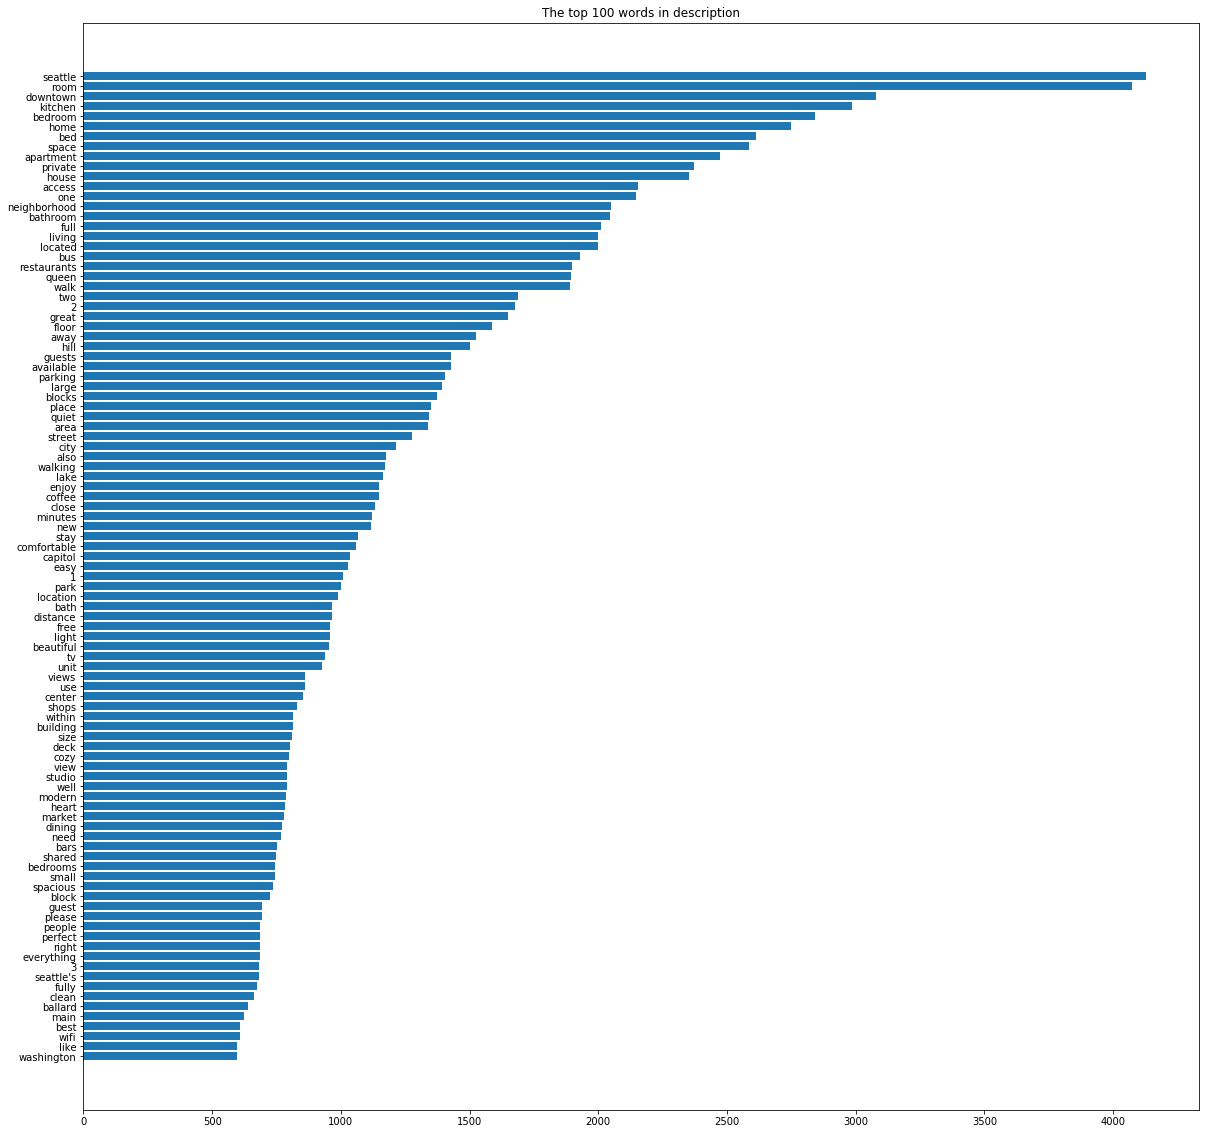

In [22]:
# Make the list of each word in each row
word_list = []
for sentence in listings['description']:
  # Split a sentence by space 
  words = sentence.split()
  for word in words:
    # Delete quotation mark etc
    word.strip('.,"()!?:-& ')
    word_list.append(word.lower())
  
# Delete stopwords by using nltk
import nltk
nltk.download('stopwords')
from nltk.corpus import stopwords
stopWords = stopwords.words('english')
words = [w for w in word_list if w not in stopWords]
# Delete quotation mark etc
words = [w.strip('.,"()!?:-& ') for w in words]
# Delete null value
words = [e for e in words if e is not '']

# Pick top 100 words
import collections
word_counter = collections.Counter(words).most_common(100)
print(word_counter)

# Plot top 100 words
X = [word_counter[x][0] for x in range(0,99)][::-1]
Y = [word_counter[y][1] for y in range(0,99)][::-1]
ax = plt.subplot()
plt.setp(ax.get_xticklabels(), rotation=0)
plt.barh(X, Y, align="center")  
plt.title('The top 100 words in description')
# plt.show()
plt.savefig('screenshot2.png')

From the above, we see what most of hosts describe about a room and Seattle. 

The last question is 

*   How much difference is average of number of reviews with or without categorical data?

In [23]:
listings.columns

Index(['id', 'listing_url', 'scrape_id', 'last_scraped', 'name', 'summary',
       'space', 'description', 'experiences_offered', 'neighborhood_overview',
       'notes', 'transit', 'thumbnail_url', 'medium_url', 'picture_url',
       'xl_picture_url', 'host_id', 'host_url', 'host_name', 'host_since',
       'host_location', 'host_about', 'host_response_time',
       'host_response_rate', 'host_acceptance_rate', 'host_is_superhost',
       'host_thumbnail_url', 'host_picture_url', 'host_neighbourhood',
       'host_listings_count', 'host_total_listings_count',
       'host_verifications', 'host_has_profile_pic', 'host_identity_verified',
       'street', 'neighbourhood', 'neighbourhood_cleansed',
       'neighbourhood_group_cleansed', 'city', 'state', 'zipcode', 'market',
       'smart_location', 'country_code', 'country', 'latitude', 'longitude',
       'is_location_exact', 'property_type', 'room_type', 'accommodates',
       'bathrooms', 'bedrooms', 'beds', 'bed_type', 'amenities', '

In [0]:
def clean_data(listings):
  '''
  Pick id, notes, neighborhood_overview, host_about, summary, space, transit
  number_of_reviews

  '''
  drop_columns = ['listing_url', 'scrape_id', 'last_scraped', 'name',
       'description', 'experiences_offered', 'thumbnail_url', 'medium_url', 'picture_url',
       'xl_picture_url', 'host_id', 'host_url', 'host_name', 'host_since',
       'host_location', 'host_response_time',
       'host_response_rate', 'host_acceptance_rate', 'host_is_superhost',
       'host_thumbnail_url', 'host_picture_url', 'host_neighbourhood',
       'host_listings_count', 'host_total_listings_count',
       'host_verifications', 'host_has_profile_pic', 'host_identity_verified',
       'street', 'neighbourhood', 'neighbourhood_cleansed',
       'neighbourhood_group_cleansed', 'city', 'state', 'zipcode', 'market',
       'smart_location', 'country_code', 'country', 'latitude', 'longitude',
       'is_location_exact', 'property_type', 'room_type', 'accommodates',
       'bathrooms', 'bedrooms', 'beds', 'bed_type', 'amenities', 'square_feet',
       'price', 'weekly_price', 'monthly_price', 'security_deposit',
       'cleaning_fee', 'guests_included', 'extra_people', 'minimum_nights',
       'maximum_nights', 'calendar_updated', 'has_availability',
       'availability_30', 'availability_60', 'availability_90',
       'availability_365', 'calendar_last_scraped',
       'first_review', 'last_review', 'review_scores_rating',
       'review_scores_accuracy', 'review_scores_cleanliness',
       'review_scores_checkin', 'review_scores_communication',
       'review_scores_location', 'review_scores_value', 'requires_license',
       'license', 'jurisdiction_names', 'instant_bookable',
       'cancellation_policy', 'require_guest_profile_picture',
       'require_guest_phone_verification', 'calculated_host_listings_count',
       'reviews_per_month']
  # Drop columns
  df = listings.drop(columns=drop_columns)

  # Remove rows where number_of_reviews == nan if exists
  df = df.dropna(subset=['number_of_reviews'])

  return df


In [25]:
df = clean_data(listings)
df

,id,summary,space,neighborhood_overview,notes,transit,host_about,number_of_reviews
0,241032,NaN,Make your self at home in this charming one-be...,NaN,NaN,NaN,"I am an artist, interior designer, and run a s...",207
1,953595,Chemically sensitive? We've removed the irrita...,"Beautiful, hypoallergenic apartment in an extr...","Queen Anne is a wonderful, truly functional vi...",What's up with the free pillows? Our home was...,"Convenient bus stops are just down the block, ...",Living east coast/left coast/overseas. Time i...,43
2,3308979,New modern house built in 2013. Spectacular s...,"Our house is modern, light and fresh with a wa...",Upper Queen Anne is a charming neighborhood fu...,Our house is located just 5 short blocks to To...,A bus stop is just 2 blocks away. Easy bus a...,i love living in Seattle. i grew up in the mi...,20
3,7421966,A charming apartment that sits atop Queen Anne...,NaN,NaN,NaN,NaN,NaN,0
4,278830,Cozy family craftman house in beautiful neighb...,Cozy family craftman house in beautiful neighb...,We are in the beautiful neighborhood of Queen ...,Belltown,The nearest public transit bus (D Line) is 2 b...,"Hi, I live in Seattle, Washington but I'm orig...",38
...,...,...,...,...,...,...,...,...
3813,8101950,Our 3BR/2BA house boasts incredible views of t...,"Our 3BR/2BA house bright, stylish, and wheelch...",We're located near lots of family fun. Woodlan...,NaN,NaN,NaN,1
3814,8902327,800 square foot 1 bedroom basement apartment w...,This space has a great view of Portage Bay wit...,The neighborhood is a quiet oasis that is clos...,This is a basement apartment in a newer reside...,Uber and Car2go are good options in Seattle. T...,I am a 58 year old male that is married to Mag...,2
3815,10267360,"Very comfortable lower unit. Quiet, charming m...",NaN,NaN,NaN,NaN,NaN,0
3816,9604740,Cozy studio condo in the heart on Madison Park...,Fully furnished unit to accommodate most needs...,Madison Park offers a peaceful slow pace upsca...,NaN,Yes,NaN,0


In [26]:
# Some category columns
category_columns = ['summary', 'space', 'neighborhood_overview', 'notes', 'transit', 'host_about']

def mean_number_of_reviews(df,category_columns):
  null_num = []
  not_null_num = []

  for cat in category_columns:
    df_null_num = df[df[cat].isnull()]['number_of_reviews'].mean()
    df_not_null_num = df[df[cat].notnull()]['number_of_reviews'].mean()
    null_num.append(df_null_num)
    not_null_num.append(df_not_null_num)

  return null_num, not_null_num

print(mean_number_of_reviews(df,category_columns))
df_null_num = df[df['host_about'].isnull()]['number_of_reviews'].mean()
print(df_null_num)
df_not_null_num = df[df['host_about'].notnull()]['number_of_reviews'].mean()
print(df_not_null_num)

([50.84180790960452, 5.1810193321616875, 17.843992248062015, 17.53362391033624, 15.769807280513918, 7.771827706635623], [20.832188959077175, 25.20806401969837, 23.84565685570711, 25.628390596745028, 24.31345353675451, 26.41872254139912])
7.771827706635623
26.41872254139912


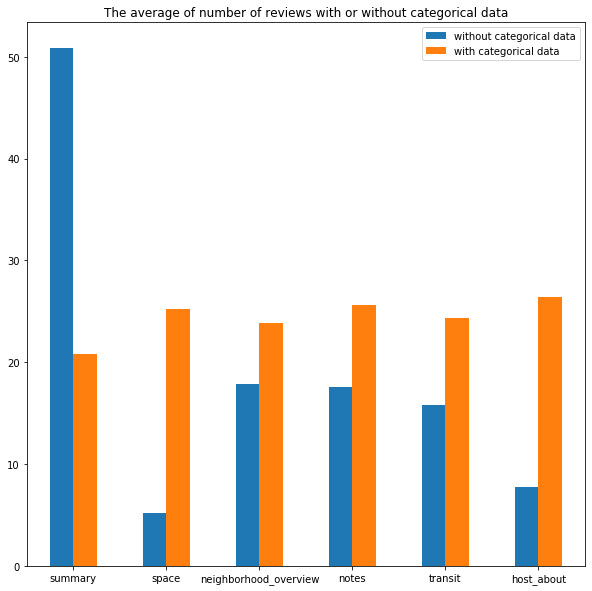

In [27]:
# Plot histogram in average of number of reviews with or without categorical data
legend = ['without categorical data', 'with categorical data']
num_null = mean_number_of_reviews(df,category_columns)[0]
num_not_null = mean_number_of_reviews(df,category_columns)[1]

rcParams['figure.figsize'] = 10, 10
df_hist = pd.DataFrame(np.c_[num_null, num_not_null], index=category_columns, columns=legend)
df_hist.plot.bar()

plt.xticks(rotation=0)
plt.title('The average of number of reviews with or without categorical data')
# plt.show()
plt.savefig('screenshot3.png')

The result shows;  
summary doesn't affect to the number of reviews even if summay is null.
space, neighborhood_overview, notes, transit and host_about have more reviews if there are not null.